## 로지스틱 회귀분석

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
# 실수를 출력할 소수점 자리수를 설정합니다.
%precision 3
pd.options.display.precision = 3

In [3]:
# 통계 관련 라이브러리를 호출합니다.
from scipy import stats
import pingouin as pg

In [4]:
# 시각화 및 통계 분석 관련 모듈을 호출합니다.
from GraphicSetting import *
import HelloDataScience as hds

### 실습 데이터셋 준비

In [5]:
# 인터넷에 공유 중인 텍스트 데이터를 읽고 데이터프레임 df를 생성합니다.
df = pd.read_csv(filepath_or_buffer = 'https://bit.ly/Univ_Admit')

In [6]:
# df의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    object 
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [7]:
# df의 처음 5행을 출력합니다.
df.head()

,admit,gre,gpa,rank
0,Fail,380,3.61,3
1,Pass,660,3.67,3
2,Pass,800,4.00,1
3,Pass,640,3.19,4
4,Fail,520,2.93,4


In [8]:
# y절편 역할을 수행할 상수 1을 df의 두 번째 열로 삽입합니다.
df.insert(loc = 1, column = 'const', value = 1)

### 실습 데이터셋 전처리

In [9]:
# rank를 문자형으로 변환합니다.
df['rank'] = df['rank'].astype(str)

In [10]:
# 연속형 변수의 기술통계량을 확인합니다.
df.describe()

,const,gre,gpa
count,400.0,400.000,400.000
mean,1.0,587.700,3.390
std,0.0,115.517,0.381
min,1.0,220.000,2.260
25%,1.0,520.000,3.130
50%,1.0,580.000,3.395
75%,1.0,660.000,3.670
max,1.0,800.000,4.000


In [11]:
# 범주형 변수의 기술통계량을 확인합니다.
df.describe(include = object)

,admit,rank
count,400,400
unique,2,4
top,Fail,2
freq,273,151


In [12]:
# rank의 원소별 빈도수를 출력합니다.
df['rank'].value_counts().sort_index()

1     61
2    151
3    121
4     67
Name: rank, dtype: int64

### 목표변수 시각화

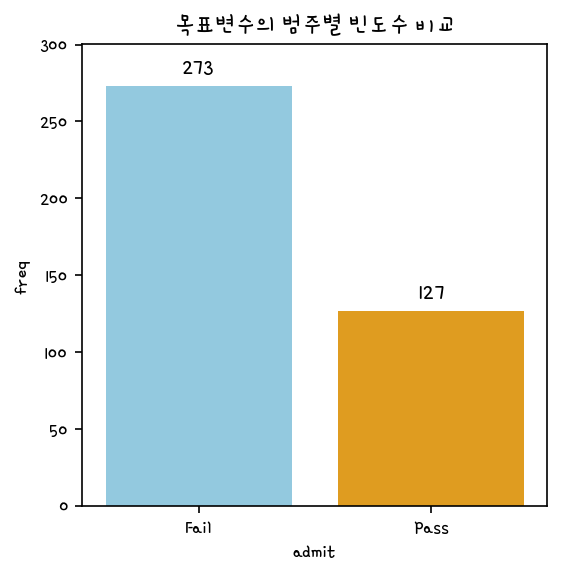

In [13]:
# 목표변수 범주별 빈도수로 일변량 막대 그래프를 그립니다.
hds.plot_bar_freq(
    data = df, 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)

### 입력변수와 관계 파악: gre

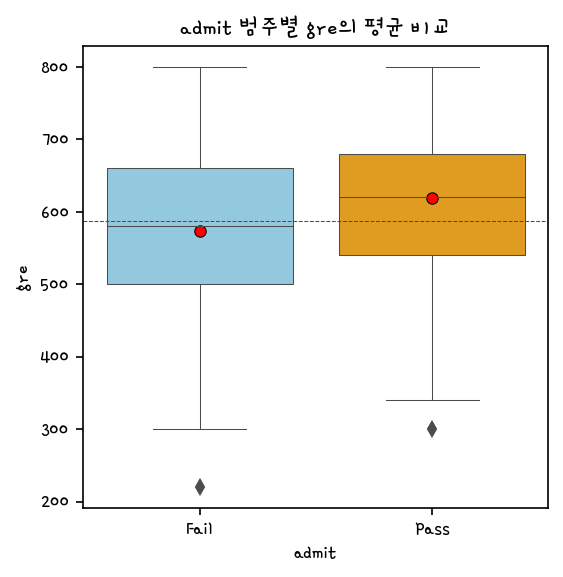

In [14]:
# admit 범주별 gre의 상자 수염 그림을 그립니다.
hds.plot_box_group(
    data = df, 
    x = 'admit', 
    y = 'gre', 
    pal = ['skyblue', 'orange']
)

### 입력변수와 관계 파악: gpa

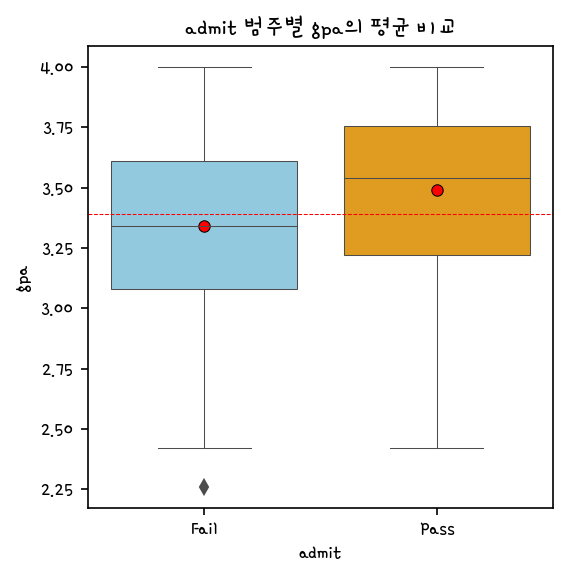

In [15]:
# admit 범주별 gpa의 상자 수염 그림을 그립니다.
hds.plot_box_group(
    data = df, 
    x = 'admit', 
    y = 'gpa', 
    pal = ['skyblue', 'orange']
)

### 입력변수와 관계 파악: rank

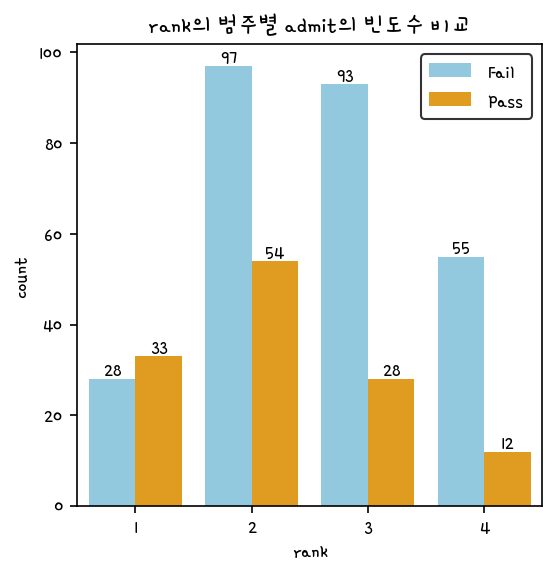

In [16]:
# rank 범주별 admit의 빈도수로 묶음 막대 그래프를 그립니다.
hds.plot_bar_dodge_freq(
    data = df, 
    x = 'rank', 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)

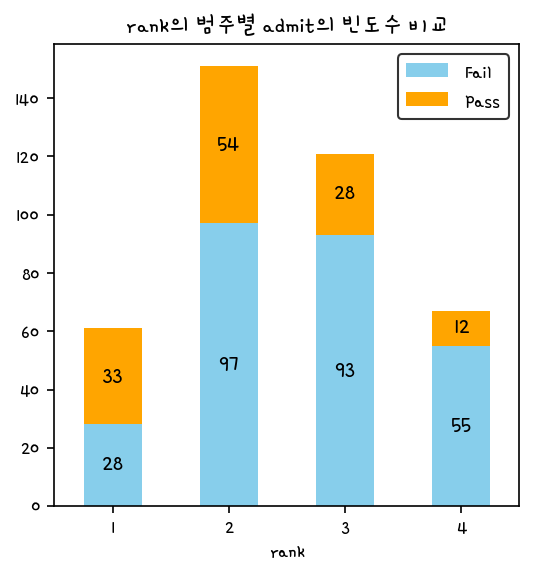

In [17]:
# rank 범주별 admit의 빈도수로 쌓은 막대 그래프를 그립니다.
hds.plot_bar_stack_freq(
    data = df, 
    x = 'rank', 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)

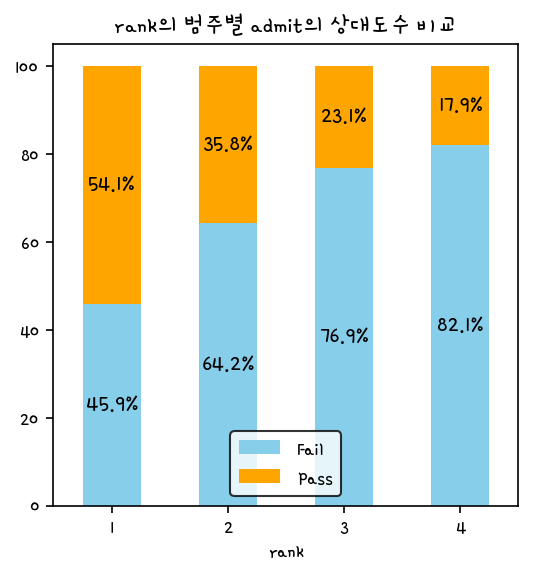

In [19]:
# rank 범주별 admit의 상대도수로 쌓은 막대 그래프를 그립니다.
hds.plot_bar_stack_prop(
    data = df, 
    x = 'rank', 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)
plt.legend(loc = 'lower center');

### t-검정: gre

In [20]:
# 정규성 검정을 실행합니다.
pg.normality(data = df, dv = 'gre', group = 'admit')

,W,pval,normal
Fail,0.988,0.022,False
Pass,0.976,0.021,False


In [21]:
# admit 범주별 gre로 시리즈를 생성합니다.
sp1 = df['gre'][df['admit'].eq('Fail')]
sp2 = df['gre'][df['admit'].eq('Pass')]

In [22]:
# (정규성 가정 불만족) 맨-휘트니 U 검정을 실행합니다.
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,13543.5,two-sided,4.192e-04,0.219,0.391


### t-검정 : gpa

In [23]:
# 정규성 검정을 실행합니다.
pg.normality(data = df, dv = 'gpa', group = 'admit')

,W,pval,normal
Fail,0.982,1.574e-03,False
Pass,0.955,3.394e-04,False


In [24]:
# admit 범주별 gpa로 시리즈를 생성합니다.
sp1 = df['gpa'][df['admit'].eq('Fail')]
sp2 = df['gpa'][df['admit'].eq('Pass')]

In [25]:
# (정규성 가정 불만족) 맨-휘트니 U 검정을 실행합니다.
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,13224.0,two-sided,1.334e-04,0.237,0.381


### 교차분석: rank

In [26]:
# 범주형 입력변수 rank와 목표변수의 교차테이블을 출력합니다.
pd.crosstab(index = df['rank'], 
            columns = df['admit'], 
            normalize = 'index', 
            margins = True)

admit,Fail,Pass
rank,,
1,0.459,0.541
2,0.642,0.358
3,0.769,0.231
4,0.821,0.179
All,0.682,0.318


In [27]:
# 교차테이블 빈도수로 교차분석(카이제곱 검정)을 실행합니다.
pg.chi2_independence(data = df, x = 'rank', y = 'admit')

(admit     Fail    Pass
 rank                  
 1       41.633  19.367
 2      103.058  47.943
 3       82.582  38.417
 4       45.727  21.273,
 admit  Fail  Pass
 rank             
 1        28    33
 2        97    54
 3        93    28
 4        55    12,
                  test  lambda    chi2  dof       pval  cramer  power
 0             pearson   1.000  25.242  3.0  1.374e-05   0.251  0.994
 1        cressie-read   0.667  25.070  3.0  1.493e-05   0.250  0.993
 2      log-likelihood   0.000  25.010  3.0  1.537e-05   0.250  0.993
 3       freeman-tukey  -0.500  25.209  3.0  1.396e-05   0.251  0.994
 4  mod-log-likelihood  -1.000  25.617  3.0  1.147e-05   0.253  0.994
 5              neyman  -2.000  27.098  3.0  5.616e-06   0.260  0.996)

### 더미변수 생성

In [28]:
# 범주형 입력변수로 더미변수를 생성합니다.
df = pd.get_dummies(data = df, columns = ['rank', 'admit'], 
                    drop_first = True)

In [29]:
# df의 처음 10행을 출력합니다.
df.head(n = 10)

,const,gre,gpa,rank_2,rank_3,rank_4,admit_Pass
0,1,380,3.61,0,1,0,0
1,1,660,3.67,0,1,0,1
2,1,800,4.00,0,0,0,1
3,1,640,3.19,0,0,1,1
4,1,520,2.93,0,0,1,0
5,1,760,3.00,1,0,0,1
6,1,560,2.98,0,0,0,1
7,1,400,3.08,1,0,0,0
8,1,540,3.39,0,1,0,1
9,1,700,3.92,1,0,0,0


In [30]:
# 목표변수명을 'admit'으로 변경합니다.
df = df.rename(columns = {'admit_Pass': 'admit'})

### 실습 데이터셋 분할

In [31]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [32]:
# 전체 데이터의 70%를 훈련셋, 30%를 시험셋으로 분할합니다.
trSet, teSet = train_test_split(df, test_size = 0.3, random_state = 0)

In [33]:
# 훈련셋의 목표변수 범주별 상대도수를 확인합니다.
trSet['admit'].value_counts(normalize = True)

0    0.682
1    0.318
Name: admit, dtype: float64

In [34]:
# 시험셋의 목표변수 범주별 상대도수를 확인합니다.
teSet['admit'].value_counts(normalize = True)

0    0.683
1    0.317
Name: admit, dtype: float64

### 입력변수와 목표변수 분리

In [35]:
# 목표변수명을 변수에 할당합니다.
yvar = 'admit'

In [36]:
# 훈련셋을 목표변수 벡터와 입력변수 행렬로 분리합니다.
trReal = trSet[yvar].copy()
trSetX = trSet.drop(columns = [yvar])

In [37]:
# 시험셋을 목표변수 벡터와 입력변수 행렬로 분리합니다.
teReal = teSet[yvar].copy()
teSetX = teSet.drop(columns = [yvar])

### 로지스틱 회귀모형 적합 함수 생성

In [38]:
# 관련 라이브러리를 호출합니다.
import statsmodels.api as sa

In [39]:
# 로지스틱 회귀모형을 반환하는 함수를 생성합니다.
def glm(y, X):
    model = sa.GLM(endog = y, exog = X, family = sa.families.Binomial())
    return model.fit()

### 로지스틱 회귀모형 적합 및 결과 확인

In [40]:
# 훈련셋으로 로지스틱 회귀모형을 적합합니다.
fit1 = glm(y = trReal, X = trSetX)

In [41]:
# fit1 모형의 적합 결과를 확인합니다.
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  280
Model:                            GLM   Df Residuals:                      274
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -160.27
Date:                Wed, 26 Oct 2022   Deviance:                       320.53
Time:                        15:37:11   Pearson chi2:                     279.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1003
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3721      1.353     -2.492      0.013      -6.024      -0.720
gre            0.0013      0.001      0.999      0.318      -0.001       0.004
gpa            0.8190      0.390      2.103      0.035       0.056       1.582
rank_2        -0.7190      0.373     -1.930      0.054      -1.449       0.011
rank_3        -1.4775      0.416     -3.555      0.000      -2.292      -0.663
rank_4        -1.8588      0.519     -3.584      0.000      -2.875      -0.842
==============================================================================
"""

### 로지스틱 회귀모형의 유의성 검정

In [42]:
# 두 모형의 이탈도 차이를 출력합니다.(검정통계량)
devGap = fit1.null_deviance - fit1.deviance
devGap

29.606

In [43]:
# 두 모형의 자유도 차이를 출력합니다.(카이제곱 분포의 자유도)
dfGap = fit1.df_model
dfGap

5

In [44]:
# 검정통계량과 자유도로 유의확률을 출력합니다.
1 - stats.chi2.cdf(x = devGap, df = dfGap)

0.000

### 다중공선성 확인

In [45]:
# 분산팽창지수를 출력하고 다중공선성 입력변수를 확인합니다.
hds.vif(X = trSetX)

,gre,gpa,rank_2,rank_3,rank_4
0,1.158,1.175,2.185,2.042,1.77


### 오즈비 확인

In [46]:
# 입력변수별 회귀계수의 오즈비를 출력합니다.
np.exp(fit1.params)

const     0.034
gre       1.001
gpa       2.268
rank_2    0.487
rank_3    0.228
rank_4    0.156
dtype: float64

### 표준화 회귀계수 확인

In [47]:
# fit1 모형의 회귀계수를 출력합니다.
fit1.params

const    -3.372
gre       0.001
gpa       0.819
rank_2   -0.719
rank_3   -1.477
rank_4   -1.859
dtype: float64

In [48]:
# 표준화 회귀계수를 생성합니다.
beta_z = hds.std_coefs(model = fit1)
beta_z

const    -0.000
gre       0.147
gpa       0.316
rank_2   -0.352
rank_3   -0.666
rank_4   -0.696
dtype: float64

In [49]:
# 표준화 회귀계수의 절대값을 오름차순 정렬한 결과를 출력합니다.
beta_z.abs().sort_values()

const     0.000
gre       0.147
gpa       0.316
rank_2    0.352
rank_3    0.666
rank_4    0.696
dtype: float64

### 목표변수의 추정확률 생성

In [50]:
# 훈련셋으로 fit1 모형의 추정확률을 생성하고 실제값과 비교합니다.
trProb = fit1.predict(exog = trSetX)
pd.DataFrame(data = {'Real': trReal, 'Prob': trProb})

,Real,Prob
92,0,0.531
223,0,0.272
234,1,0.632
232,0,0.302
377,1,0.551
...,...,...
323,0,0.206
192,0,0.278
117,0,0.462
47,0,0.103


In [51]:
# 시험셋으로 fit1 모형의 추정확률을 생성하고 실제값과 비교합니다.
teProb = fit1.predict(exog = teSetX)
pd.DataFrame(data = {'Real': teReal, 'Prob': teProb})

,Real,Prob
132,0,0.362
309,0,0.136
341,1,0.123
196,0,0.183
246,0,0.380
...,...,...
216,0,0.363
259,0,0.462
49,0,0.169
238,0,0.095


### 분류모형 성능 평가 : ROC 곡선

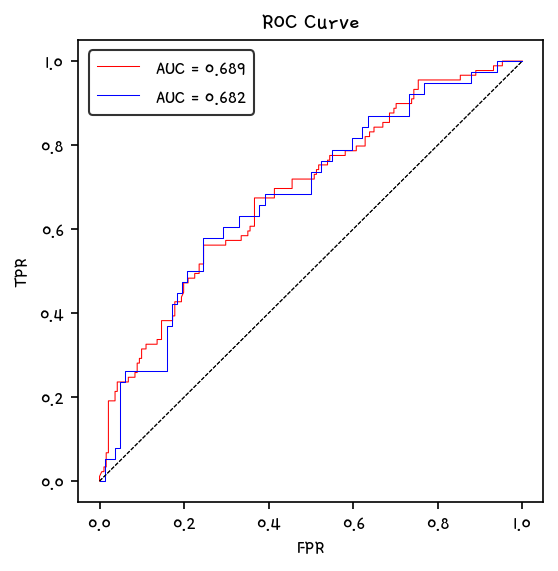

In [52]:
# 훈련셋과 시험셋의 추정확률로 ROC 곡선을 그립니다.
hds.plot_roc(y_true = trReal, y_prob = trProb, color = 'red')
hds.plot_roc(y_true = teReal, y_prob = teProb, color = 'blue')

### 목표변수의 추정값 생성

In [53]:
# 분리 기준점을 0.5로 설정합니다.
cutoff = 0.5

In [54]:
# 훈련셋의 목표변수 추정값(라벨)을 생성합니다.
trPred1 = np.where(trProb >= cutoff, 1, 0)

In [55]:
# 시험셋의 목표변수 추정값(라벨)을 생성합니다.
tePred1 = np.where(teProb >= cutoff, 1, 0)

### 분류모형 성능 평가 : 혼동행렬 리포트

In [56]:
# 훈련셋 추정값으로 혼동행렬 리포트를 출력합니다.
hds.clfmetrics(y_true = trReal, y_pred = trPred1)

▶ Confusion Matrix
[[175  16]
 [ 67  22]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7231    0.9162    0.8083       191
           1     0.5789    0.2472    0.3465        89

    accuracy                         0.7036       280
   macro avg     0.6510    0.5817    0.5774       280
weighted avg     0.6773    0.7036    0.6615       280



In [57]:
# 시험셋 추정값으로 혼동행렬 리포트를 출력합니다.
hds.clfmetrics(y_true = teReal, y_pred = tePred1)

▶ Confusion Matrix
[[77  5]
 [28 10]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7333    0.9390    0.8235        82
           1     0.6667    0.2632    0.3774        38

    accuracy                         0.7250       120
   macro avg     0.7000    0.6011    0.6004       120
weighted avg     0.7122    0.7250    0.6822       120



### [참고] 혼동행렬 관련 함수

In [58]:
# 관련 라이브러리를 호출합니다.
from sklearn import metrics

In [59]:
# 시험셋 추정값으로 혼동행렬을 출력합니다.
print(metrics.confusion_matrix(y_true = teReal, y_pred = tePred1))

[[77  5]
 [28 10]]


In [60]:
# 시험셋 추정값으로 분류모형 리포트를 출력합니다.
print(metrics.classification_report(y_true = teReal, y_pred = tePred1))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        82
           1       0.67      0.26      0.38        38

    accuracy                           0.73       120
   macro avg       0.70      0.60      0.60       120
weighted avg       0.71      0.72      0.68       120



In [61]:
# 시험셋 추정값으로 F1 점수를 출력합니다.
metrics.f1_score(y_true = teReal, y_pred = tePred1, pos_label = 1)

0.377

### [참고] 목표변수의 범주별 추정확률 분포

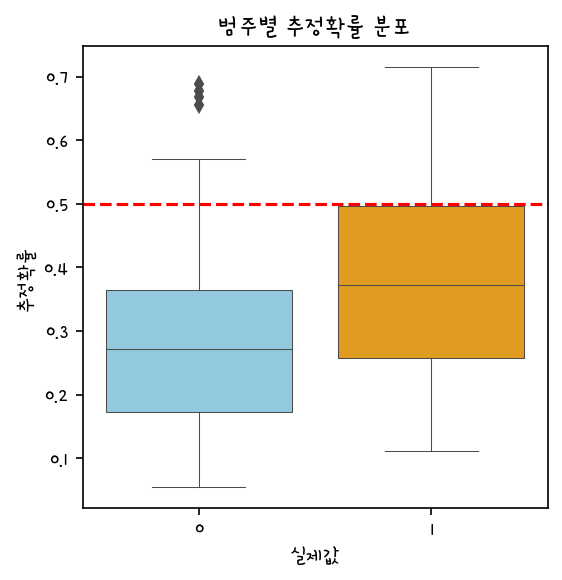

In [62]:
# 목표변수 범주별 추정확률 분포를 확인합니다.
sns.boxplot(x = trReal, y = trProb)
plt.title(label = '범주별 추정확률 분포')
plt.xlabel(xlabel = '실제값')
plt.ylabel(ylabel = '추정확률')
plt.axhline(y = 0.5, color = 'red', lw = 1.5, ls = '--');

### [참고] 최적의 분리 기준점 탐색

In [63]:
# 분리 기준점마다 분류모형의 성능지표를 계산한 데이터프레임을 생성합니다.
cfm = hds.clfCutoffs(y_true = trReal, y_prob = trProb)
cfm

,Cutoff,Sensitivity,Specificity,Optimal,Precision,TPR,FPR,MCC
0,0.00,1.0,0.0,1.0,0.318,1.0,1.0,0.0
1,0.01,1.0,0.0,1.0,0.318,1.0,1.0,0.0
2,0.02,1.0,0.0,1.0,0.318,1.0,1.0,0.0
3,0.03,1.0,0.0,1.0,0.318,1.0,1.0,0.0
4,0.04,1.0,0.0,1.0,0.318,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
96,0.96,0.0,1.0,1.0,1.000,0.0,0.0,0.0
97,0.97,0.0,1.0,1.0,1.000,0.0,0.0,0.0
98,0.98,0.0,1.0,1.0,1.000,0.0,0.0,0.0
99,0.99,0.0,1.0,1.0,1.000,0.0,0.0,0.0


In [65]:
cfm[cfm['Optimal'].eq(cfm['Optimal'].max())]

,Cutoff,Sensitivity,Specificity,Optimal,Precision,TPR,FPR,MCC
32,0.32,0.674,0.634,1.308,0.462,0.674,0.366,0.287


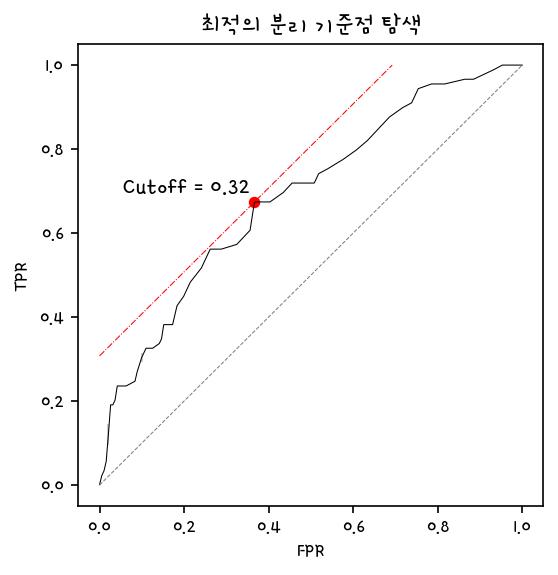

In [64]:
# 민감도와 특이도의 합계가 최댓값일 때의 분리 기준점을 확인합니다.
hds.EpiROC(obj = cfm)

### [참고] 최적의 분리 기준점으로 성능지표 확인

In [66]:
# 최적의 분리 기준점을 설정합니다.
cutoff = 0.32

In [67]:
# 분리 기준점 변경 후 시험셋의 목표변수 추정값(라벨)을 생성합니다.
tePred2 = np.where(teProb >= cutoff, 1, 0)

In [68]:
# 분리 기준점 변경 후 시험셋 추정값으로 혼동행렬과 F1 점수를 확인합니다.
hds.clfmetrics(y_true = teReal, y_pred = tePred2)

▶ Confusion Matrix
[[57 25]
 [15 23]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7917    0.6951    0.7403        82
           1     0.4792    0.6053    0.5349        38

    accuracy                         0.6667       120
   macro avg     0.6354    0.6502    0.6376       120
weighted avg     0.6927    0.6667    0.6752       120



In [69]:
# 분리 기준점 변경 전 시험셋 추정값으로 혼동행렬과 F1 점수를 확인합니다.
hds.clfmetrics(y_true = teReal, y_pred = tePred1)

▶ Confusion Matrix
[[77  5]
 [28 10]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7333    0.9390    0.8235        82
           1     0.6667    0.2632    0.3774        38

    accuracy                         0.7250       120
   macro avg     0.7000    0.6011    0.6004       120
weighted avg     0.7122    0.7250    0.6822       120



### [참고] 매튜의 상관계수

In [70]:
# 분리 기준점 변경 전 시험셋 추정값으로 매튜의 상관계수를 확인합니다.
metrics.matthews_corrcoef(y_true = teReal, y_pred = tePred1)

0.284

In [71]:
# 분리 기준점 변경 후 시험셋 추정값으로 매튜의 상관계수를 확인합니다.
metrics.matthews_corrcoef(y_true = teReal, y_pred = tePred2)

0.285

In [81]:
locs = np.where(cfm['MCC'].eq(cfm['MCC'].max()))[0][0]
locs

54

In [86]:
cfm.iloc[[locs]]

,Cutoff,Sensitivity,Specificity,Optimal,Precision,TPR,FPR,MCC
54,0.54,0.236,0.958,1.194,0.724,0.236,0.042,0.297


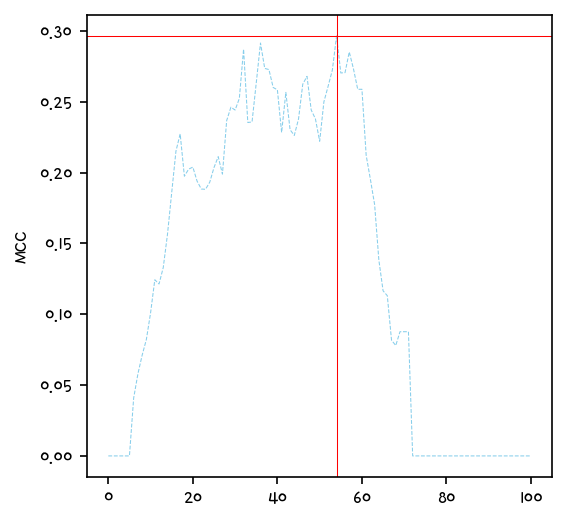

In [83]:
sns.lineplot(data = cfm, x = range(101), y = 'MCC', ls = '--')
plt.axhline(y = cfm['MCC'].max(), color = 'red')
plt.axvline(x = locs, color = 'red');

## End of Document